![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [445]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [446]:
# Implement model creation and training here
# Use as many cells as you need

In [447]:
print(insurance.shape)
insurance.dropna(inplace=True)

(1338, 7)


In [448]:
# Padronize age and children column
def transform_positive(num):
    if num < 0:
        return num * -1
    return num
        
insurance['age'] = insurance['age'].apply(transform_positive)
insurance['children'] = insurance['children'].abs()

In [449]:
# Padronize sex column


insurance['sex'] = insurance['sex'].fillna('')
insurance['sex'] = insurance['sex'].astype(str)
def padronize_sex(sex: str):
    if sex.startswith(('F', 'f', 'w', 'W')):
        return 'F'
    elif sex.startswith(('m', 'M')):
        return 'M'
        
insurance['sex'] = insurance['sex'].apply(padronize_sex)

In [450]:
# Padronize region column
insurance['region'] = insurance['region'].fillna('')
insurance['region'] = insurance['region'].astype(str)

def padronize_region(region: str):
    if region != '':
        return region.lower()


insurance['region'] = insurance['region'].apply(padronize_region)

In [451]:
# Padronize smoker column
insurance['smoker'] = insurance['smoker'].astype(str)
insurance['smoker'] = (insurance['smoker']== 'yes')

In [452]:
#Padroniza charges column
def padronize_charges(charges):
    if isinstance(charges, str) and charges.startswith('$'):
        return float((charges[1:]).replace(',', ''))
    return float(charges)

insurance['charges'] = insurance['charges'].apply(padronize_charges)
insurance.dropna(inplace=True)

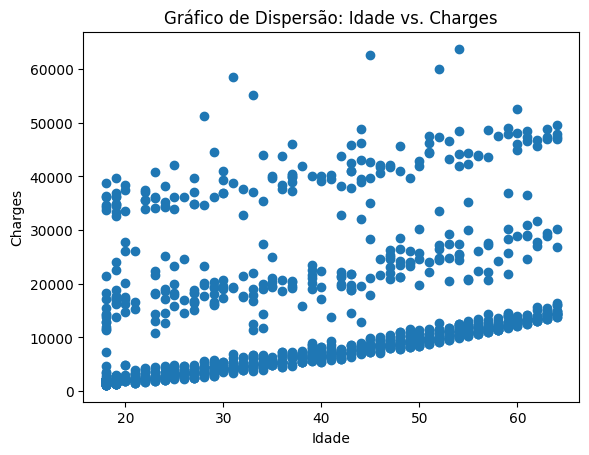

In [453]:
plt.scatter(insurance['age'], insurance['charges'])
plt.title('Gráfico de Dispersão: Idade vs. Charges')
plt.xlabel('Idade')
plt.ylabel('Charges')
plt.show()

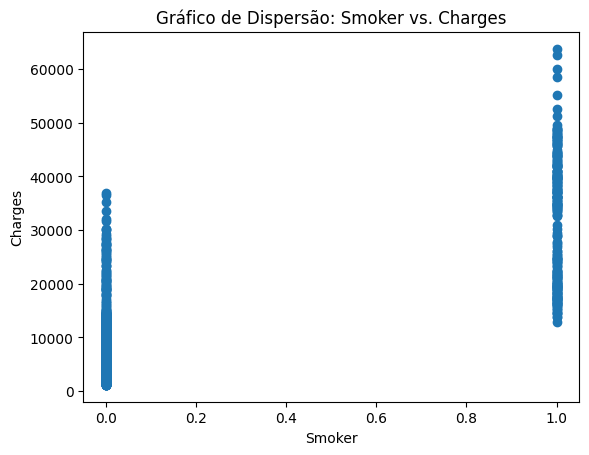

In [454]:
plt.scatter(insurance['smoker'], insurance['charges'])
plt.title('Gráfico de Dispersão: Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

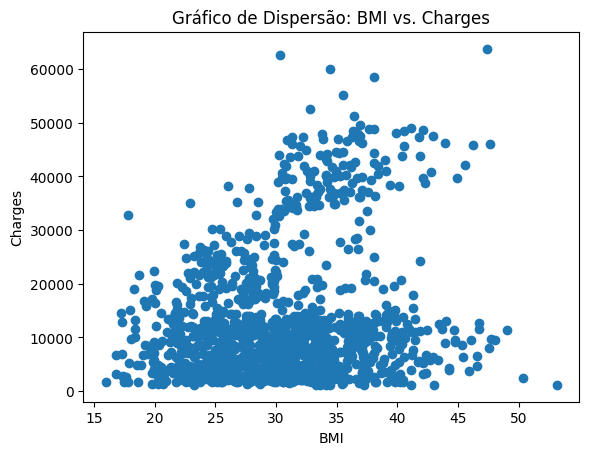

In [455]:
plt.scatter(insurance['bmi'], insurance['charges'])
plt.title('Gráfico de Dispersão: BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

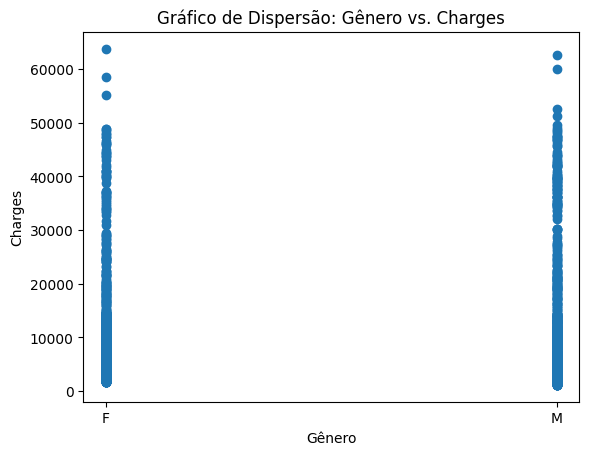

In [456]:
plt.scatter(insurance['sex'], insurance['charges'])
plt.title('Gráfico de Dispersão: Gênero vs. Charges')
plt.xlabel('Gênero')
plt.ylabel('Charges')
plt.show()

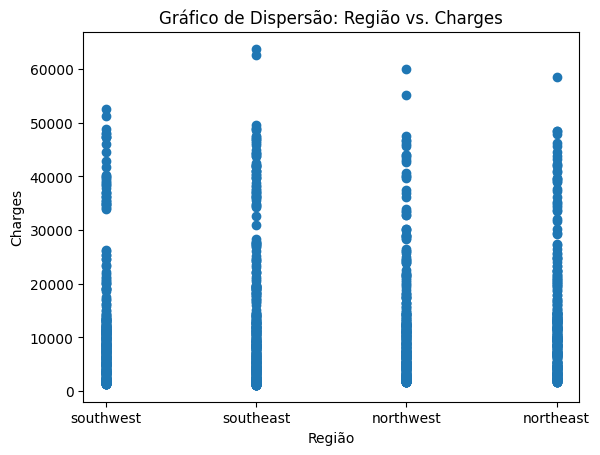

In [457]:
plt.scatter(insurance['region'], insurance['charges'])
plt.title('Gráfico de Dispersão: Região vs. Charges')
plt.xlabel('Região')
plt.ylabel('Charges')
plt.show()

In [458]:
# Preparing data for (linear)regression

#Transforming sex column to binary representation
insurance['sex'] = (insurance['sex'] == 'M')

insurance = pd.get_dummies(insurance, columns=['region'], drop_first=True)
insurance.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19.0,False,27.900,0.0,True,16884.92400,False,False,True
1,18.0,True,33.770,1.0,False,1725.55230,False,True,False
2,28.0,True,33.000,3.0,False,4449.46200,False,True,False
3,33.0,True,22.705,0.0,False,21984.47061,True,False,False
4,32.0,True,28.880,0.0,False,3866.85520,True,False,False


In [459]:
# Fit a linear regression model to the data

X = insurance.drop(columns=['charges'])
Y = insurance['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)

print(f'R² = {r2}')

R² = 0.7049323160872816


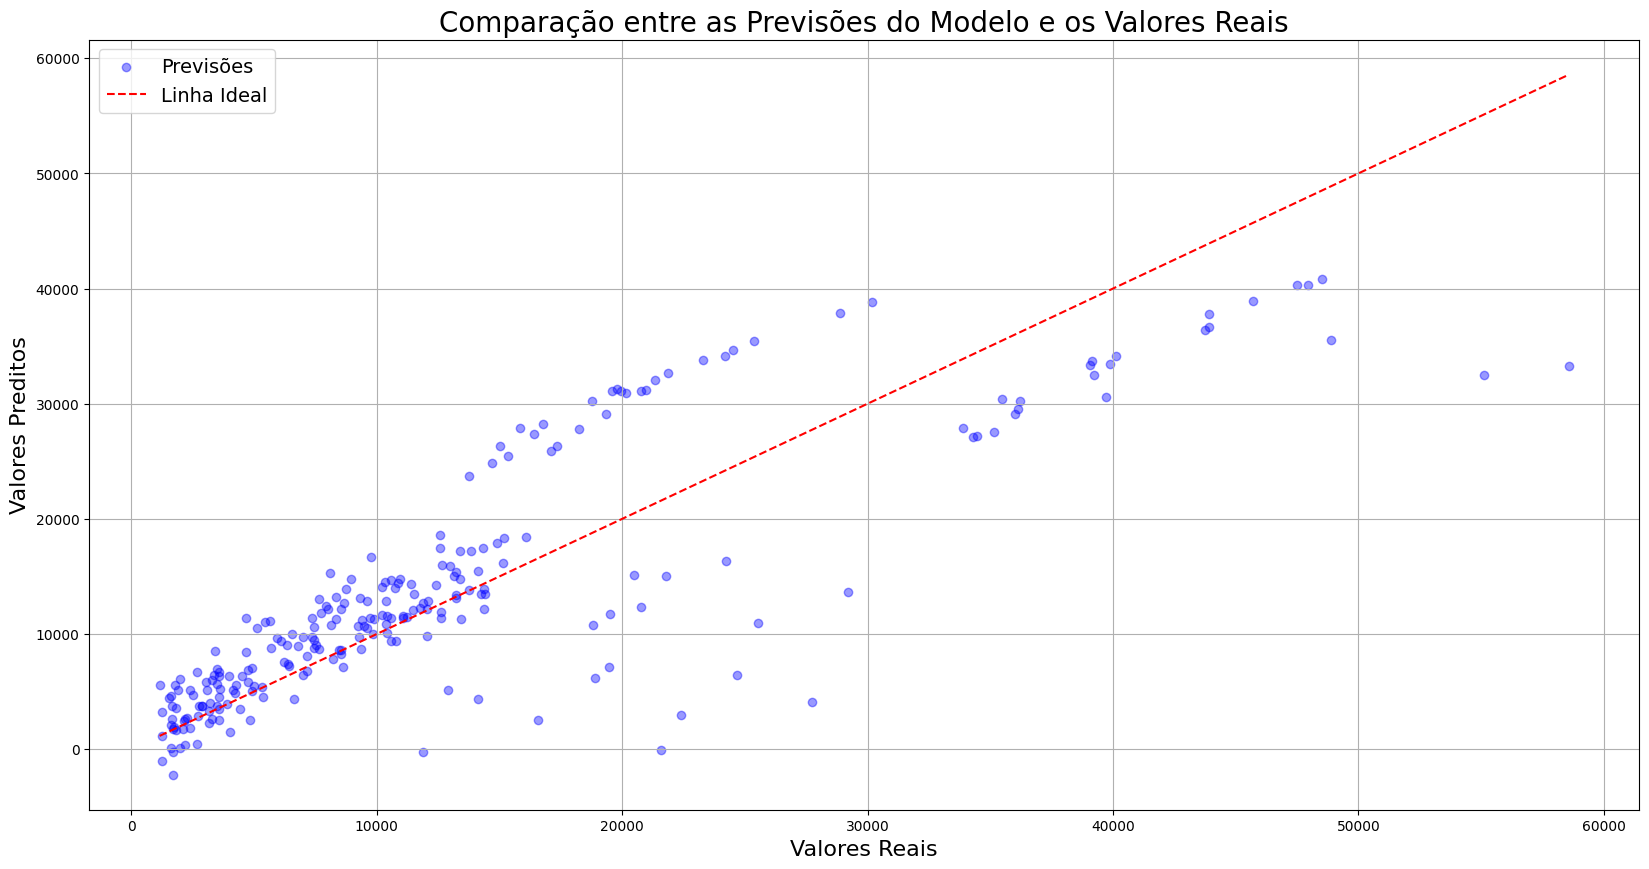

In [469]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.4, label='Previsões')

# Adicionando a linha ideal (linha de y = x)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Linha Ideal')

plt.title('Comparação entre as Previsões do Modelo e os Valores Reais', fontsize=20)
plt.xlabel('Valores Reais', fontsize=16)
plt.ylabel('Valores Preditos', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)

plt.show()


In [468]:
val_df = pd.read_csv(r'C:\Users\gabri\Documents\Projetos\Python\mlds\Regression-Example\Regression-Example\validation_dataset.csv')

val_df['children'] = val_df['children'].apply(transform_positive)
val_df['age'] = val_df['age'].apply(transform_positive)
val_df['sex'] = val_df['sex'].apply(padronize_sex)
val_df['sex'] = (val_df['sex'] == 'M')
val_df['smoker'] = val_df['smoker'].astype(str)
val_df['smoker'] = (val_df['smoker']== 'yes')
val_df = pd.get_dummies(val_df, columns=['region'], drop_first=True)

validation = model.predict(val_df)

validation_new = [x if x > 0 else 100 for x in validation]

validation = val_df.copy()
validation['predicted_charges'] = validation_new

validation.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,predicted_charges
0,18.0,False,24.090000,1.0,False,False,True,False,352.537878
1,39.0,True,26.410000,0.0,True,False,False,False,30956.214707
2,27.0,True,29.150000,0.0,True,False,True,False,27799.409607
3,71.0,True,65.502135,13.0,True,False,True,False,57194.414804
4,28.0,True,38.060000,0.0,False,False,True,False,6685.426312
